In [ ]:
# pip install ISLP
# isl/assingment3

In [ ]:
import numpy as np
import statsmodels.api as sm
from ISLP import (load_data , confusion_table)
from ISLP.models import (ModelSpec as MS, summarize , sklearn_sm)

# import matplotlib.pyplot as plt

from sklearn.model_selection import (train_test_split, cross_validate,KFold,ShuffleSplit)
from sklearn.metrics import mean_squared_error as mse
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.neighbors import KNeighborsClassifier as KNN

In [ ]:
#load data
data = load_data('Weekly')
data

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


<Axes: >

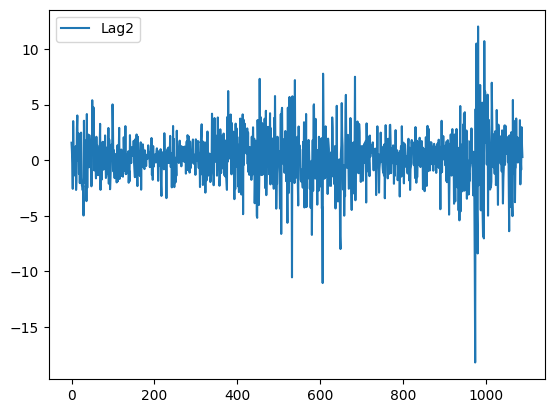

In [ ]:
data.plot(y='Lag2')

In [ ]:
predictors = data.columns.drop(['Year','Today' , 'Direction'])
design = MS(predictors)
X = design.fit_transform(data) # intercept values
y = data.Direction == 'Up'
model1 = sm.GLM(y , X , family=sm.families.Binomial())
result = model1.fit() # train the model
summarize(result)

,coef,std err,z,P>|z|
intercept,0.2669,0.086,3.106,0.002
Lag1,-0.0413,0.026,-1.563,0.118
Lag2,0.0584,0.027,2.175,0.030
Lag3,-0.0161,0.027,-0.602,0.547
Lag4,-0.0278,0.026,-1.050,0.294
Lag5,-0.0145,0.026,-0.549,0.583
Volume,-0.0227,0.037,-0.616,0.538


In [ ]:
predictions = result.predict() # predict using model
labels = np.array(['Down'] * len(data))
labels[predictions > 0.5] = 'Up'
confusion_table(labels , data.Direction)

Truth,Down,Up
Predicted,,
Down,54,48
Up,430,557


In [ ]:
accuracy_for_logistic = (54+557)/(54+557+48+430)
accuracy_for_logistic

0.5610651974288338

In [ ]:
updated_year = data.Year <= 2008
train_data = data.loc[updated_year]
test_data = data.loc[~updated_year]
train_data , test_data

(     Year    Lag1    Lag2    Lag3    Lag4    Lag5    Volume  Today Direction
 0    1990   0.816   1.572  -3.936  -0.229  -3.484  0.154976 -0.270      Down
 1    1990  -0.270   0.816   1.572  -3.936  -0.229  0.148574 -2.576      Down
 2    1990  -2.576  -0.270   0.816   1.572  -3.936  0.159837  3.514        Up
 3    1990   3.514  -2.576  -0.270   0.816   1.572  0.161630  0.712        Up
 4    1990   0.712   3.514  -2.576  -0.270   0.816  0.153728  1.178        Up
 ..    ...     ...     ...     ...     ...     ...       ...    ...       ...
 980  2008  12.026  -8.389  -6.198  -3.898  10.491  5.841565 -2.251      Down
 981  2008  -2.251  12.026  -8.389  -6.198  -3.898  6.093950  0.418        Up
 982  2008   0.418  -2.251  12.026  -8.389  -6.198  5.932454  0.926        Up
 983  2008   0.926   0.418  -2.251  12.026  -8.389  5.855972 -1.698      Down
 984  2008  -1.698   0.926   0.418  -2.251  12.026  3.087105  6.760        Up
 
 [985 rows x 9 columns],
       Year   Lag1   Lag2   Lag3   La

In [ ]:
design = MS(predictors)
X = design.fit_transform(train_data) # intercept values
y = train_data.Direction == 'Up'
model_updated = sm.GLM(y , X , family=sm.families.Binomial())
result = model1.fit() # train the model
summarize(result)

,coef,std err,z,P>|z|
intercept,0.2669,0.086,3.106,0.002
Lag1,-0.0413,0.026,-1.563,0.118
Lag2,0.0584,0.027,2.175,0.030
Lag3,-0.0161,0.027,-0.602,0.547
Lag4,-0.0278,0.026,-1.050,0.294
Lag5,-0.0145,0.026,-0.549,0.583
Volume,-0.0227,0.037,-0.616,0.538


In [ ]:
design = MS(predictors)
x_test = design.fit_transform(test_data)
predictions = result.predict(x_test)
labels = np.array(['Down']*len(test_data))
labels[predictions > 0.5] = "Up"
confusion_table(labels, test_data.Direction)

Truth,Down,Up
Predicted,,
Down,17,13
Up,26,48


In [ ]:
(17+48)/(17+48+13+26)

0.625

In [ ]:
model2 = LDA() # create a Model
X = X.drop(['intercept'] , axis=1) # delete intercept col

In [ ]:
model2.fit(X,y) # train the model
lda_predictions = model2.predict(X)
# lda_predictions
confusion_table(lda_predictions , y)

Truth,False,True
Predicted,,
False,79,70
True,362,474


In [ ]:
accuracy_for_LDA = (57+492)/(57+492+52+384)
accuracy_for_LDA

0.5573604060913706

In [ ]:
model_nb = NB()
model_nb.fit(X,y)
nb_predict = model_nb.predict(X)
confusion_table(nb_predict , y)

Truth,False,True
Predicted,,
False,79,69
True,362,475


In [ ]:
(79+475)/(79+69+362+475)

0.5624365482233502

In [ ]:
knn_model = KNN(n_neighbors=1)
knn_model.fit(X,y)
knn_pred = knn_model.predict(X)
confusion_table(knn_pred , y)

Truth,False,True
Predicted,,
False,441,0
True,0,544


In [ ]:
#100 % accuracy